# Data Expo 2009 - Airline on-time performance
## by (Mahmoud Lotfi)

## Preliminary Wrangling

- The data consists of flight arrival and departure details for all commercial flights within the USA, from October 1987 to April 2008. 
- This is a large dataset: there are nearly 120 million records in total, and takes up 1.6 gigabytes of space compressed and 12 gigabytes when uncompressed. 
- The data comes originally from RITA where it is described in detail. 
- the data in bzipped csv file. 
- These files have derivable variables removed, are packaged in yearly chunks and have been more heavily compressed than the originals.
- in this project we will discuss flight delay for __2008__ data set

### Individual years:

1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008

### Our scope on 2008 dataset


## How to Run the project:
- Insrt raw data download in __"./data/raw"__
- Run the script __"Communicate-Dtata-Finding\src\data\make_dataset.py"__
- Now you can find output data from script  __"Communicate-Dtata-Finding/data/interim/*.csv"__
- Run the notebook in __"Communicate-Dtata-Finding\notebooks\exploration.ipynb"__ to find __Exploratory data__
- Run the notebook in __"Communicate-Dtata-Finding\notebooks\explanatory.ipynb"__ to find __Explanatory data__

In [222]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

# display static image online 
%matplotlib inline

# display zoomable images inline
#%matplotlib notebook

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

### User define function and general configrations

In [223]:
'''
# center plot figure
from IPython.core.display import HTML
HTML(
    """
    <style>    .output_png 
    {    
    display: table-cell;    
    text-align: center;    
    vertical-align: 
    middle;
    }
    </style>
    """
    )

'''

'\n# center plot figure\nfrom IPython.core.display import HTML\nHTML(\n    """\n    <style>    .output_png \n    {    \n    display: table-cell;    \n    text-align: center;    \n    vertical-align: \n    middle;\n    }\n    </style>\n    """\n    )\n\n'

In [224]:
# reset seaborn settings
sns.reset_orig()
# set plotting color
base_color = sns.color_palette()[0]

In [225]:
def load_dataset(name='flights'):
    '''
    Description: load dataset acoordding to year
    parameter name string flights, diverted, canceled
    return dataframe
    '''
    t1 = time.time()
    df = pd.read_csv('../data/interim/{}.csv'.format(name))
    t2 = time.time()
    print('Elapsed loading time :', t2-t1)
    return df

In [226]:
def plot_bar_str(df, col, inc, base_color , figsize = None, rotation = 0 , log =None):
    month_frq = df[col].value_counts()
    month_max_count = month_frq[0]
    month_max_prop = month_max_count/1000
    tick_prop = np.arange(0, month_max_prop, inc)
    tick_names = ['{:0.0f}K'.format(v) for v in tick_prop]
    if figsize:
        plt.figure(figsize=figsize)
        
    plt.yticks(tick_prop*1000, tick_names)
    ax = plt.gca()
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    plt.xticks(rotation=rotation)
    if log:
        plt.yscale('log')
    plt.grid()
    sns.countplot(data = flights, x=col, color = base_color, order = month_frq.index, ax=ax);

In [227]:
def sort_time_fmt(df1, col):
    df = df1[col].value_counts().to_frame()
    df['hours'] = pd.to_datetime(df.index, format='%I:%M %p').hour
    df['minutes'] = pd.to_datetime(df.index, format='%I:%M %p').minute
    df = df.reset_index()
    df.columns = [col, 'frequency' , 'hours' , 'minutes']
    df = df.sort_values(['hours', 'minutes'])
    df = df.drop(columns=['minutes'])
    df = df.groupby('hours').sum().reset_index()
    df.columns = [col, 'frequency']   
    return df

In [228]:
def plot_line_time_fmt(df, x, y='frequency', figsize=(12, 4)):
    order = df.index
    max_count = df[y].max()
    max_prop = max_count/1000
    tick_prop = np.arange(0, max_prop, 100)
    tick_names = ['{:0.0f}K'.format(v) for v in tick_prop]
    plt.figure(figsize=figsize)
    ax = plt.gca()
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    plt.yticks(tick_prop*1000, tick_names)
    df.plot(x=x, y=y, ax =ax);
    plt.grid()

In [229]:
def plot_hist(col, inc, figsize = None, rotation = 0 , log =None , scale=1, x_right=False, 
             x_left=False, y_top=False, y_bottom=False):
    if scale == 1000:
        k='K'
    else:
        k=''
    inc = 1
    max_prop = (1.25*flights['ActualElapsedTimePmile'].max())/scale
    tick_prop = np.arange(0, max_prop, inc)
    tick_names = ['{:0.0f}{}'.format(v,k) for v in tick_prop]
    if figsize:
        plt.figure(figsize=figsize)

    plt.yticks(tick_prop*scale, tick_names)
    ax = plt.gca()

    plt.xticks(rotation=rotation)
    if log:
        plt.yscale('log')
    plt.grid(alpha= 0.2)
    sns.distplot(flights['ActualElapsedTimePmile'], ax=ax);
    plt.xlim(right=1);  # adjust the right leaving left unchanged
    plt.xlim(left=0);  # adjust the left leaving right unchanged
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    plt.grid()

In [230]:
'''
# relative frequency
# return the highest frequency 
month_max_count = month_frq[0]
month_max_prop = month_max_count/flights.shape[0]
tick_prop = np.arange(0, month_max_prop, 0.02)
tick_names = ['{:0.2f}'.format(v) for v in tick_prop]
plt.yticks(tick_prop*flights.shape[0], tick_names)
plt.grid()
sns.countplot(data = flights, x='Month', color = base_color, order = month_frq.index);
'''

"\n# relative frequency\n# return the highest frequency \nmonth_max_count = month_frq[0]\nmonth_max_prop = month_max_count/flights.shape[0]\ntick_prop = np.arange(0, month_max_prop, 0.02)\ntick_names = ['{:0.2f}'.format(v) for v in tick_prop]\nplt.yticks(tick_prop*flights.shape[0], tick_names)\nplt.grid()\nsns.countplot(data = flights, x='Month', color = base_color, order = month_frq.index);\n"

#### Run "../src/data/make_dataset.py" to divide the data set into three part for easier handling nan values
the output of the script in:
- ../data/interim/flights.csv
- ../data/interim/diverted.csv
- ../data/interim/canceled.csv

In [231]:
# now we will load flights dataset 2008
flights = load_dataset()
# print df size
print(flights.shape)
# dispay first 10 rows
flights.head()

Elapsed loading time : 27.910651206970215
(7009728, 26)


,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,Origin,Dest,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,08:03 PM,07:55 PM,10:11 PM,10:25 PM,WN,335,...,IAD,TPA,810,4.0,8.0,0,0,0,0,0
1,2008,1,3,4,07:54 AM,07:35 AM,10:02 AM,10:00 AM,WN,3231,...,IAD,TPA,810,5.0,10.0,0,0,0,0,0
2,2008,1,3,4,06:28 AM,06:20 AM,08:04 AM,07:50 AM,WN,448,...,IND,BWI,515,3.0,17.0,0,0,0,0,0
3,2008,1,3,4,09:26 AM,09:30 AM,10:54 AM,11:00 AM,WN,1746,...,IND,BWI,515,3.0,7.0,0,0,0,0,0
4,2008,1,3,4,06:29 PM,05:55 PM,07:59 PM,07:25 PM,WN,3920,...,IND,BWI,515,3.0,10.0,2,0,0,0,32


In [232]:
# get df data types and schema
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7009728 entries, 0 to 7009727
Data columns (total 26 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Year               int64  
 1   Month              int64  
 2   DayofMonth         int64  
 3   DayOfWeek          int64  
 4   DepTime            object 
 5   CRSDepTime         object 
 6   ArrTime            object 
 7   CRSArrTime         object 
 8   UniqueCarrier      object 
 9   FlightNum          int64  
 10  TailNum            object 
 11  ActualElapsedTime  float64
 12  CRSElapsedTime     float64
 13  AirTime            float64
 14  ArrDelay           float64
 15  DepDelay           float64
 16  Origin             object 
 17  Dest               object 
 18  Distance           int64  
 19  TaxiIn             float64
 20  TaxiOut            float64
 21  CarrierDelay       int64  
 22  WeatherDelay       int64  
 23  NASDelay           int64  
 24  SecurityDelay      int64  
 25  LateAircraftDelay 

In [233]:
flights.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay',
       'LateAircraftDelay'],
      dtype='object')

In [234]:
totals_flights = flights.shape[0]

In [235]:
# find the number of duplicated rows
flights.duplicated().sum()

4

In [236]:
# drop duplicated rows
flights = flights.drop_duplicates()

In [237]:
# check number of duplicated rows
flights.duplicated().sum()

0

In [238]:
# check for null in each column
# flights.isna().sum()
flights.isnull().sum()

Year                      0
Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime              136767
CRSDepTime                0
ArrTime              154326
CRSArrTime              547
UniqueCarrier             0
FlightNum                 0
TailNum               83365
ActualElapsedTime    154699
CRSElapsedTime          844
AirTime              154699
ArrDelay             154699
DepDelay             136246
Origin                    0
Dest                      0
Distance                  0
TaxiIn               151649
TaxiOut              137058
CarrierDelay              0
WeatherDelay              0
NASDelay                  0
SecurityDelay             0
LateAircraftDelay         0
dtype: int64

In [239]:
# drop all rows with any NaN and Null values
flights = flights.dropna()

In [240]:
# check for null in each column
# flights.isna().sum()
flights.isnull().sum()

Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
DepTime              0
CRSDepTime           0
ArrTime              0
CRSArrTime           0
UniqueCarrier        0
FlightNum            0
TailNum              0
ActualElapsedTime    0
CRSElapsedTime       0
AirTime              0
ArrDelay             0
DepDelay             0
Origin               0
Dest                 0
Distance             0
TaxiIn               0
TaxiOut              0
CarrierDelay         0
WeatherDelay         0
NASDelay             0
SecurityDelay        0
LateAircraftDelay    0
dtype: int64

In [241]:
# the size after deleting null
flights.shape[0] - totals_flights

-157896

In [242]:
# change schema
flights['Year']              = flights['Year'].astype('str')
flights['Month']             = flights['Month'].astype('str')
flights['DayofMonth']        = flights['DayofMonth'].astype('str')
flights['DayOfWeek']         = flights['DayOfWeek'].astype('str')

flights['DepTime']           = flights['DepTime'].astype('str')          
flights['CRSDepTime']        = flights['CRSDepTime'].astype('str')        
flights['ArrTime']           = flights['ArrTime'].astype('str')          
flights['CRSArrTime']        = flights['CRSArrTime'].astype('str')        

flights['UniqueCarrier']     = flights['UniqueCarrier'].astype('str')  
flights['FlightNum']         = flights['FlightNum'].astype('str')  
flights['TailNum']           = flights['TailNum'].astype('str') 

flights['ActualElapsedTime'] = flights['ActualElapsedTime'].astype('int') 
flights['CRSElapsedTime']    = flights['CRSElapsedTime'].astype('int') 
flights['AirTime']           = flights['AirTime'].astype('int') 
flights['ArrDelay']          = flights['ArrDelay'].astype('int') 
flights['DepDelay']          = flights['DepDelay'].astype('int') 

flights['Origin']            = flights['Origin'].astype('str') 
flights['Dest']              = flights['Dest'].astype('str') 

flights['Distance']          = flights['Distance'].astype('int') 

flights['TaxiIn']            = flights['TaxiIn'].astype('int')  
flights['TaxiOut']           = flights['TaxiOut'].astype('int') 

flights['CarrierDelay']      = flights['CarrierDelay'].astype('int')  
flights['WeatherDelay']      = flights['WeatherDelay'].astype('int') 
flights['NASDelay']          = flights['NASDelay'].astype('int') 
flights['SecurityDelay']     = flights['SecurityDelay'].astype('int') 
flights['LateAircraftDelay'] = flights['LateAircraftDelay'].astype('int') 

In [243]:
# get df data types and schema
flights.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6851832 entries, 0 to 7009727
Data columns (total 26 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   Year               object
 1   Month              object
 2   DayofMonth         object
 3   DayOfWeek          object
 4   DepTime            object
 5   CRSDepTime         object
 6   ArrTime            object
 7   CRSArrTime         object
 8   UniqueCarrier      object
 9   FlightNum          object
 10  TailNum            object
 11  ActualElapsedTime  int32 
 12  CRSElapsedTime     int32 
 13  AirTime            int32 
 14  ArrDelay           int32 
 15  DepDelay           int32 
 16  Origin             object
 17  Dest               object
 18  Distance           int32 
 19  TaxiIn             int32 
 20  TaxiOut            int32 
 21  CarrierDelay       int32 
 22  WeatherDelay       int32 
 23  NASDelay           int32 
 24  SecurityDelay      int32 
 25  LateAircraftDelay  int32 
dtypes: int32(13), 

In [244]:
flights.describe().astype(int)

MemoryError: Unable to allocate 680. MiB for an array with shape (13, 6851832) and data type object

## 01. Flights without cancellation nor divertion dataset:

### What is the structure of your dataset?

> There are 6,851,832 flight observations with 26 features in 2008 without diverted/cancelled flights and missing or incorrect​ data.


### What is/are the main feature(s) of interest in your dataset?

> Delayed flights in terms of carriers, origin & time.


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> ArrDelay, Month, DayOfWeek, DepTime, ArrTime, UniqueCarrier.

In [ ]:
# now we will load flights dataset 2008
cancelled = load_dataset('canceled')
# print df size
print(cancelled.shape)
# dispay first 10 rows
cancelled.head()

In [ ]:
# get df data types and schema
cancelled.info()

In [ ]:
cancelled.columns

In [ ]:
totals_cancelled = cancelled.shape[0]

In [ ]:
# find the number of duplicated rows
cancelled.duplicated().sum()

In [ ]:
# check for null in each column
# flights.isna().sum()
cancelled.isnull().sum()

In [ ]:
# drop all columns with any NaN and NaT values
cancelled = cancelled.dropna(axis=1)

In [ ]:
# check for null in each column
# flights.isna().sum()
cancelled.isnull().sum()

In [ ]:
# the size after deleting null
cancelled.shape[0] - totals_cancelled

In [ ]:
# change schema
cancelled['Year']              = cancelled['Year'].astype('str')
cancelled['Month']             = cancelled['Month'].astype('str')
cancelled['DayofMonth']        = cancelled['DayofMonth'].astype('str')
cancelled['DayOfWeek']         = cancelled['DayOfWeek'].astype('str')

cancelled['CRSDepTime']        = cancelled['CRSDepTime'].astype('str')        
cancelled['CRSArrTime']        = cancelled['CRSArrTime'].astype('str')        

cancelled['UniqueCarrier']     = cancelled['UniqueCarrier'].astype('str')  
cancelled['FlightNum']         = cancelled['FlightNum'].astype('str')  

cancelled['Origin']            = cancelled['Origin'].astype('str') 
cancelled['Dest']              = cancelled['Dest'].astype('str') 

cancelled['Distance']          = cancelled['Distance'].astype('int') 
cancelled['CancellationCode']  = cancelled['CancellationCode'].astype('str') 

In [ ]:
# get df data types and schema
cancelled.info()

In [ ]:
cancelled.describe().astype(int)

## 02. Flights that have been Cancellation:

### What is the structure of your dataset?

> There are 137,434 flight observations with 12 features in 2008.


### What is/are the main feature(s) of interest in your dataset?

 - what are the worstest airlines in terms of cancelled flighes?
 - what are the most cases of flights cancelled?


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> UniqueCarrier, CancellationCode

In [ ]:
# now we will load flights dataset 2008
diverted = load_dataset('diverted')
# print df size
print(diverted.shape)
# dispay first 10 rows
diverted.head()

In [ ]:
# get df data types and schema
diverted.info()

In [ ]:
diverted.columns

In [ ]:
totals_diverted = diverted.shape[0]

In [ ]:
# find the number of duplicated rows
diverted.duplicated().sum()

In [ ]:
# check for null in each column
# flights.isna().sum()
diverted.isnull().sum()

In [ ]:
# drop all columns with any NaN and NaT values
diverted = diverted.dropna(axis=1)

In [ ]:
# check for null in each column
# flights.isna().sum()
diverted.isnull().sum()

In [ ]:
# the size after deleting null
diverted.shape[0] - totals_diverted

In [ ]:
# change schema
diverted['Year']              = diverted['Year'].astype('str')
diverted['Month']             = diverted['Month'].astype('str')
diverted['DayofMonth']        = diverted['DayofMonth'].astype('str')
diverted['DayOfWeek']         = diverted['DayOfWeek'].astype('str')

diverted['DepTime']           = diverted['DepTime'].astype('str')          
diverted['CRSDepTime']        = diverted['CRSDepTime'].astype('str')        

diverted['UniqueCarrier']     = diverted['UniqueCarrier'].astype('str')  
diverted['FlightNum']         = diverted['FlightNum'].astype('str')  

diverted['DepDelay']          = diverted['DepDelay'].astype('int') 

diverted['Origin']            = diverted['Origin'].astype('str') 
diverted['Dest']              = diverted['Dest'].astype('str') 

diverted['Distance']          = diverted['Distance'].astype('int') 

In [ ]:
# get df data types and schema
diverted.info()

In [ ]:
diverted.describe().astype(int)

## 03. Flights that have been diverted:

### What is the structure of your dataset?

> There are 17,265 flight observations with 12 features in 2008.


### What is/are the main feature(s) of interest in your dataset?

> what are the Origin & Dest that have the most diverted flighes?


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Origin & Dest.

## Expoloring Flights dataset:

### 01. Flight dataset Year column:
    range :	 1987-2008 

In [ ]:
flights.Year.value_counts()

### 02. Flight dataset Month column:
    range :	 1-12                                                        

In [ ]:
flights.Month.describe()

In [ ]:
plot_bar_str(flights, 'Month', 100, base_color)

#### Bar plot indicate the number of flights per month

In [ ]:
plot_bar_str(flights, 'Month', 100, base_color , log =True)

Most of fights occured on summer , less on winter  

### 03. Flight dataset DayofMonth column:
    range :	 1-31

In [ ]:
flights.DayofMonth.describe()

#### Bar plot indicate the number of flights per day of month

In [ ]:
plot_bar_str(flights, 'DayofMonth', 50, base_color, (10, 4))

There are not big difference amonge monthes in the flights number during the days of months, and its natural to be less half flights during 31th.

### 04. Flight dataset DayOfWeek column:
    range :	 1 (Monday) - 7 (Sunday)

In [ ]:
# substitute number with actual day of week name 
days = ['', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
for i in flights.DayOfWeek.unique():
    if str(i).isnumeric():
        flights.DayOfWeek.replace(i,days[int(i)], inplace=True)

In [ ]:
flights.DayOfWeek.describe()

In [ ]:
plot_bar_str(flights, 'DayOfWeek', 200, base_color, rotation =45)

#### Bar plot indicate the number of flights per day of week

In [ ]:
plot_bar_str(flights, 'DayOfWeek', 200, base_color, rotation =45, log=True)

There are not big difference amonge flights number during working days 'Tuesday', 'Wednesday', 'Thursday', 'Friday' , and less  flights during Sunday , and more less in Saturday.

### 05. Flight dataset DepTime column:
    range :	 00:00 AM-11:59 PM  
    actual departure time (local, hh:mm AM/PM)

In [ ]:
flights.DepTime.describe()

In [ ]:
# sort time in ascending order with its frequency
df = sort_time_fmt(flights, 'DepTime')

In [ ]:
df[df.frequency == df.frequency.max()]

### line plot indicate the number of actual departed flights over the day time

In [ ]:
plot_line_time_fmt(df, 'DepTime', 'frequency', figsize=(12, 4))

### 06. Flight dataset CRSDepTime column:
    range :	 00:00 AM-11:59 PM  
    scheduled departure time (local, hh:mm AM/PM)

In [ ]:
flights.CRSDepTime.describe()

In [ ]:
df = sort_time_fmt(flights, 'CRSDepTime')
df.head()

In [ ]:
df[df.frequency == df.frequency.max()]

### line plot indicate the number of scheduled departed flights over the day time

In [ ]:
plot_line_time_fmt(df, 'CRSDepTime', 'frequency', figsize=(12, 4))

### 07. Flight dataset ArrTime column:
    range :	 00:00 AM-11:59 PM  
    actual arrival time (local, hh:mm AM/PM)

In [ ]:
flights.ArrTime.describe()

In [ ]:
df = sort_time_fmt(flights, 'ArrTime')
df.head()

In [ ]:
df[df.frequency == df.frequency.max()]

### line plot indicate the number of actual arrival flights over the day time

In [ ]:
plot_line_time_fmt(df, 'ArrTime', 'frequency', figsize=(12, 4))

### 08. Flight dataset CRSArrTime column:
    range :	 00:00 AM-11:59 PM  
    scheduled arrival time (local, hh:mm AM/PM)

In [ ]:
flights.CRSArrTime.describe()

In [ ]:
df = sort_time_fmt(flights, 'CRSArrTime')
df.head()

In [ ]:
df[df.frequency == df.frequency.max()]

### line plot indicate the number of scheduled arrival flights over the day time

In [ ]:
plot_line_time_fmt(df, 'CRSArrTime', 'frequency', figsize=(12, 4))

### 09. Flight dataset UniqueCarrier column:
    range :	 1 - 20 string
    unique carrier code 

In [ ]:
flights.UniqueCarrier.describe()

#### Bar plot indicate the number of flights per carrier

In [ ]:
plot_bar_str(flights, 'UniqueCarrier', 200, base_color, (10, 4), rotation =0)

apperantly WN carrier have the most share of flights about 1,186,911 flight.

In [ ]:
plot_bar_str(flights, 'UniqueCarrier', 200, base_color, (10, 4), rotation =0, log=True)

### 10. Flight dataset FlightNum column:
    range :	string
    flight number 

In [ ]:
flights.FlightNum.describe()

### 11. Flight dataset TailNum column:
    range :	string
    plane tail number :
    aircraft registration, unique aircraft identifier

In [ ]:
flights.TailNum.describe()

# keep the orignal then remove outliers

In [ ]:
flights_orignal = flights.copy()

In [ ]:
#flights = flights_orignal

outliers = (((df.DepDelay - df.DepDelay.mean()).abs() > df.DepDelay.std()*3) | 
            ((df.ArrDelay - df.ArrDelay.mean()).abs() > df.ArrDelay.std()*3))

In [ ]:
def outlier(df, col):
    df_non_outlier = df[(df[col] >= (2.5*df[col].quantile(.25)-1.5*df[col].quantile(.75))) & (df[col] <= (2.5*df[col].quantile(.75)-1.5*df[col].quantile(.25)))]
    return df_non_outlier

### 12. Flight dataset ActualElapsedTime column:
    range :	in minutes
    ActualElapsedTime 

In [ ]:
flights.ActualElapsedTime.describe().round(2)

In [ ]:
# remove outliers 
flights = outlier(flights, 'ActualElapsedTime')

In [ ]:
flights.ActualElapsedTime.describe().round(2)

In [ ]:
flights['ActualElapsedTimePmile'] = flights['ActualElapsedTime'].astype(float)/ flights['Distance'].astype(float)

In [ ]:
flights.ActualElapsedTimePmile.describe().round(3)

In [ ]:
bins = np.arange(0,flights['ActualElapsedTimePmile'].max()+0.1,0.1)
plt.hist(data = flights, x= 'ActualElapsedTimePmile', bins=bins);
plt.xlim(right=1);  # adjust the right leaving left unchanged
plt.xlim(left=0);  # adjust the left leaving right unchanged

In [ ]:
bins = np.arange(0,flights['ActualElapsedTimePmile'].max()+0.1,0.1)
plt.hist(data = flights, x= 'ActualElapsedTimePmile', bins=bins);
plt.xlim(right=4);  # adjust the right leaving left unchanged
plt.xlim(left=-0.5);  # adjust the left leaving right unchanged
plt.yscale('log')

#### histogram indicate the density of Actual ElapsedTime for flights per distance

In [ ]:
plot_hist(flights['ActualElapsedTimePmile'], 1, scale=1, x_right=1, x_left=0)

In [ ]:
sns.boxplot(x=flights['ActualElapsedTimePmile']);
plt.xlim(right=0.4);  # adjust the right leaving left unchanged
plt.xlim(left=0);  # adjust the left leaving right unchanged

In [ ]:
flights.boxplot(column=['ActualElapsedTimePmile']);
plt.ylim(top=0.4);  # adjust the top leaving bottom unchanged
plt.ylim(bottom=0); # adjust the bottom leaving top unchanged

### 13. Flight dataset CRSElapsedTime column:
    range :	in minutes
    CRSElapsedTime

In [ ]:
flights.CRSElapsedTime.describe().round(1)

In [ ]:
flights[flights['CRSElapsedTime'] <0]

#### remove incorrect data

In [ ]:
flights = flights[~(flights['CRSElapsedTime'] <0)]

In [ ]:
flights.CRSElapsedTime.describe().round(1)

In [ ]:
# remove outliers 
flights = outlier(flights, 'CRSElapsedTime')

In [ ]:
flights.CRSElapsedTime.describe().round(1)

In [ ]:
flights['CRSElapsedTimePmile'] = flights['CRSElapsedTime'].astype(float)/ flights['Distance'].astype(float)

In [ ]:
flights.ActualElapsedTimePmile.describe().round(3)

In [ ]:
bins = np.arange(0,flights['CRSElapsedTimePmile'].max()+0.1,0.1)
plt.hist(data = flights, x= 'CRSElapsedTimePmile', bins=bins);
plt.xlim(right=1);  # adjust the right leaving left unchanged
plt.xlim(left=0);  # adjust the left leaving right unchanged

#### histogram indicate the density of scheduled ElapsedTime for flights per distance

In [ ]:
plot_hist(flights['CRSElapsedTimePmile'], 1, scale=1, x_right=1, x_left=0)

In [ ]:
sns.distplot(flights['CRSElapsedTimePmile']);
plt.xlim(right=1);  # adjust the right leaving left unchanged
plt.xlim(left=0);  # adjust the left leaving right unchanged

In [ ]:
sns.boxplot(x=flights['CRSElapsedTimePmile']);
plt.xlim(right=0.5);  # adjust the right leaving left unchanged
plt.xlim(left=0);  # adjust the left leaving right unchanged

In [ ]:
flights.boxplot(column=['CRSElapsedTimePmile']);
plt.ylim(top=0.5);  # adjust the top leaving bottom unchanged
plt.ylim(bottom=0); # adjust the bottom leaving top unchanged

### 14. Flight dataset AirTime column:
    range :	in minutes

In [ ]:
flights.AirTime.describe().round(1)

In [ ]:
# remove outliers 
flights = outlier(flights, 'AirTime')

In [ ]:
flights.AirTime.describe().round(1)

In [ ]:
flights['AirTimePmile'] = flights['AirTime'].astype(float)/ flights['Distance'].astype(float)

In [ ]:
flights.AirTimePmile.describe().round(3)

In [ ]:
bins = np.arange(0,flights['AirTimePmile'].max()+0.1,0.1)
plt.hist(data = flights, x= 'AirTimePmile', bins=bins);
plt.xlim(right=1);  # adjust the right leaving left unchanged
plt.xlim(left=0);  # adjust the left leaving right unchanged

#### histogram indicate the density of arive Time for flights per distance

In [ ]:
plot_hist(flights['AirTimePmile'], 1, scale=1, x_right=1, x_left=0)

In [ ]:
sns.distplot(flights['AirTimePmile']);
plt.xlim(right=1);  # adjust the right leaving left unchanged
plt.xlim(left=0)  # adjust the left leaving right unchanged

In [ ]:
sns.boxplot(x=flights['AirTimePmile']);
plt.xlim(right=0.35);  # adjust the right leaving left unchanged
plt.xlim(left=0);  # adjust the left leaving right unchanged

In [ ]:
flights.boxplot(column=['AirTimePmile']);
plt.ylim(top=0.35);  # adjust the top leaving bottom unchanged
plt.ylim(bottom=0); # adjust the bottom leaving top unchanged

### 15. Flight dataset ArrDelay column:
    range :	in minutes
    arrival delay:
    A flight is counted as "on time" if it operated less than 15 minutes later the scheduled time shown in the carriers' Computerized Reservations Systems (CRS).

In [ ]:
flights.ArrDelay.describe().round(1)

In [ ]:
flights[flights['ArrDelay'] <15].shape

In [ ]:
# remove outliers 
flights = outlier(flights, 'ArrDelay')

In [ ]:
flights.ArrDelay.describe().round(1)

In [ ]:
plt.hist(data = flights, x= 'ArrDelay');
#plt.xlim(right=500);  # adjust the right leaving left unchanged
plt.xlim(left=-60);  # adjust the left leaving right unchanged

In [ ]:
plt.hist(data = flights, x= 'ArrDelay');
#plt.xlim(right=500);  # adjust the right leaving left unchanged
plt.xlim(left=-60);  # adjust the left leaving right unchanged
plt.yscale('log')

In [ ]:
plot_hist(flights['AirTimePmile'], .1)

#### histogram indicate the density of arive delayTime for flights per distance

In [ ]:
sns.distplot(flights['ArrDelay']);
#plt.xlim(right=12);  # adjust the right leaving left unchanged
#plt.xlim(left=-700);  # adjust the left leaving right unchanged
#plt.yscale('log')

In [ ]:
sns.boxplot(x=flights['ArrDelay']);
plt.xlim(right=50);  # adjust the right leaving left unchanged
plt.xlim(left=-50);  # adjust the left leaving right unchanged

In [ ]:
flights.boxplot(column=['ArrDelay']);
plt.ylim(top=50);  # adjust the top leaving bottom unchanged
plt.ylim(bottom=-50); # adjust the bottom leaving top unchanged

### 16. Flight dataset DepDelay column:
    range :	in minutes
    departure delay:

In [ ]:
flights.DepDelay.describe().round(1)

In [ ]:
flights[flights['DepDelay'] <0].shape

In [ ]:
# remove outliers 
flights = outlier(flights, 'DepDelay')

In [ ]:
flights.DepDelay.describe().round(1)

In [ ]:
plt.hist(data = flights, x= 'DepDelay');
#plt.xlim(right=1);  # adjust the right leaving left unchanged
#plt.xlim(left=0);  # adjust the left leaving right unchanged

#### histogram indicate the density of depate delay Time for flights per distance

In [ ]:
plot_hist(flights['AirTimePmile'], .1)

In [ ]:
sns.distplot(flights['DepDelay']);
#plt.xlim(right=1);  # adjust the right leaving left unchanged
#plt.xlim(left=0)  # adjust the left leaving right unchanged

In [ ]:
sns.boxplot(x=flights['DepDelay']);
#plt.xlim(right=1);  # adjust the right leaving left unchanged
#plt.xlim(left=0);  # adjust the left leaving right unchanged

In [ ]:
flights.boxplot(column=['DepDelay']);
#plt.ylim(top=1);  # adjust the top leaving bottom unchanged
#plt.ylim(bottom=0); # adjust the bottom leaving top unchanged

### 17. Flight dataset Origin column:
    range :	string
    origin IATA airport code

In [ ]:
flights.Origin.describe()

### 18. Flight dataset Dest column:
    range :	string
    destination IATA airport code 

In [ ]:
flights.Dest.describe()

### 19. Flight dataset Distance column:
    range :	in miles 
    Distance

In [ ]:
flights.Distance.describe().round(1)

### 20. Flight dataset TaxiIn column:
    range :	in minutes
    taxi in time 

In [ ]:
flights.TaxiIn.describe().round(1)

In [ ]:
# remove outliers 
flights = outlier(flights, 'TaxiIn')

In [ ]:
flights.TaxiIn.describe().round(1)

### 21. Flight dataset TaxiOut column:
    range :	in minutes 
    taxi out time 

In [ ]:
flights.TaxiOut.describe().round(1)

In [ ]:
# remove outliers 
flights = outlier(flights, 'TaxiOut')

In [ ]:
flights.TaxiOut.describe().round(1)

### 25. Flight dataset CarrierDelay column:
    range :	in minutes
    - Carrier delay is within the control of the air carrier. 
    - Examples of occurrences that may determine carrier delay are: 
        - aircraft cleaning, aircraft damage, awaiting the arrival of connecting passengers or crew, 
        - baggage, bird strike, cargo loading, catering, computer, outage-carrier equipment, 
        - crew legality (pilot or attendant rest), damage by hazardous goods, engineering inspection, fueling, 
        - handling disabled passengers, late crew, lavatory servicing, maintenance, oversales, 
        - potable water servicing, removal of unruly passenger, slow boarding or seating, 
        - stowing carry-on baggage, weight and balance delays.              

In [ ]:
flights.CarrierDelay.describe().round(3)

### 26. Flight dataset WeatherDelay column:
    range :	in minutes
    Weather delay is caused by extreme or hazardous weather conditions that are forecasted or 
    manifest themselves on point of departure, enroute, or on point of arrival. 


In [ ]:
flights.WeatherDelay.describe().round(3)

### 27. Flight dataset NASDelay column:
    range :	in minutes
    Delay that is within the control of the National Airspace System (NAS) may include: 
    non-extreme weather conditions, airport operations, heavy traffic volume, air traffic control, etc.          

In [ ]:
flights.NASDelay.describe().round(3)

### 28. Flight dataset SecurityDelay column:
    range :	in minutes
    Security delay is caused by evacuation of a terminal or concourse, re-boarding of aircraft because of security breach, inoperative screening equipment and/or long lines in excess of 29 minutes at screening areas.

In [ ]:
flights.SecurityDelay.describe().round(3)

### 29. Flight dataset LateAircraftDelay column:
    range :	in minutes
    Arrival delay at an airport due to the late arrival of the same aircraft at a previous airport. 
    The ripple effect of an earlier delay at downstream airports is referred to as delay propagation. 

In [ ]:
flights.LateAircraftDelay.describe().round(3)

## correlation matrix

In [ ]:
corrmat = flights.corr()
f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(corrmat, vmin=-1, square=True, annot=True, fmt='.2f', cmap='vlag_r', center=0);

## Saving cleaned data after romvoing outliers and duplicates

In [220]:
flights.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay',
       'LateAircraftDelay', 'ActualElapsedTimePmile', 'CRSElapsedTimePmile',
       'AirTimePmile'],
      dtype='object')

In [221]:
# drop some columns
flights = flights['Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay',
       'LateAircraftDelay']

,Year,TaxiIn,TaxiOut,ActualElapsedTimePmile,CRSElapsedTimePmile,AirTimePmile
0,2008,4,8,0.158025,0.185185,0.143210
2,2008,3,17,0.186408,0.174757,0.147573
3,2008,3,7,0.170874,0.174757,0.151456
7,2008,7,7,0.146449,0.157134,0.137649
8,2008,6,19,0.210643,0.210643,0.155211
...,...,...,...,...,...,...
7009719,2008,14,26,0.333333,0.270370,0.185185
7009721,2008,5,23,0.239927,0.205128,0.188645
7009724,2008,5,23,0.191076,0.192220,0.159039
7009726,2008,13,13,0.215760,0.219512,0.166979


In [ ]:
# saving data
t1 = time.time()
flights.to_csv('../data/processed/{}.csv'.format('flights'), index=False)
t2 = time.time()
print('Elapsed saving time :', t2-t1)

In [ ]:
cancelled.columns

In [ ]:
# drop some columns
cancelled = cancelled['Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay',
       'LateAircraftDelay']

In [ ]:
# saving data
t1 = time.time()
cancelled.to_csv('../data/processed/{}.csv'.format('cancelled'), index=False)
t2 = time.time()
print('Elapsed saving time :', t2-t1)

In [ ]:
diverted.columns

In [ ]:
# drop some columns
diverted = diverted['Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay',
       'LateAircraftDelay']

In [ ]:
# saving data
t1 = time.time()
diverted.to_csv('../data/processed/{}.csv'.format('diverted'), index=False)
t2 = time.time()
print('Elapsed saving time :', t2-t1)

## 01. Which Airlines have the longest delays

In [130]:
longest = flights[flights['ArrDelay']>0].groupby('UniqueCarrier')\
                .agg(DepDelayMean=('DepDelay', 'mean'), ArrDelayMean=('ArrDelay', 'mean'))\
                .sort_values('ArrDelayMean', ascending=False)

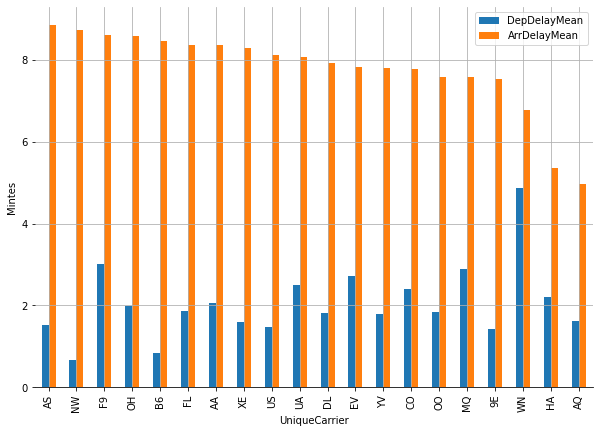

In [131]:
plt.figure(figsize=(10,7))
ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
longest.plot.bar(ax=ax);
plt.ylabel('Mintes')
plt.grid()

WN was the worste airline for departures, while AS,NW was the worst for arrivals.

## 02.What is the worst time of day to travel?

In [132]:
flights['hours'] = pd.to_datetime(flights['CRSDepTime'], format='%I:%M %p').dt.hour
flights['minutes'] = pd.to_datetime(flights['CRSDepTime'], format='%I:%M %p').dt.minute
flights = flights.sort_values(['hours', 'minutes'])
flights = flights.drop(columns=['minutes'])
df = flights[(flights['ArrDelay'] > 15)].groupby('hours')\
                .agg(ArrDelayCount=('ArrDelay', 'count'), ArrDelaysum=('ArrDelay', sum)) 
df = df.reset_index()

In [133]:
df['ArrDelayAvg'] = (df['ArrDelaysum']/df['ArrDelayCount']).round(2)

In [134]:
df

,hours,ArrDelayCount,ArrDelaysum,ArrDelayAvg
0,0,1328,10528,7.93
1,1,303,2568,8.48
2,2,75,657,8.76
3,3,65,368,5.66
4,4,159,1075,6.76
5,5,9974,76967,7.72
6,6,95883,728478,7.60
7,7,80283,620549,7.73
8,8,77599,599668,7.73
9,9,74905,567304,7.57


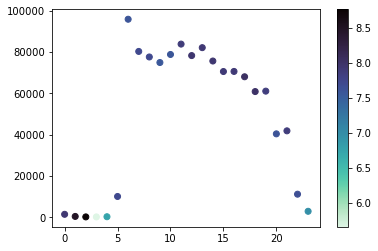

In [135]:
plt.scatter(data = df, x='hours', y='ArrDelayCount', c='ArrDelayAvg',cmap='mako_r');
plt.colorbar();

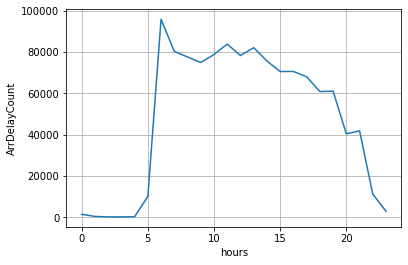

In [136]:
sns.lineplot(data = df, x='hours', y='ArrDelayCount');
plt.grid()

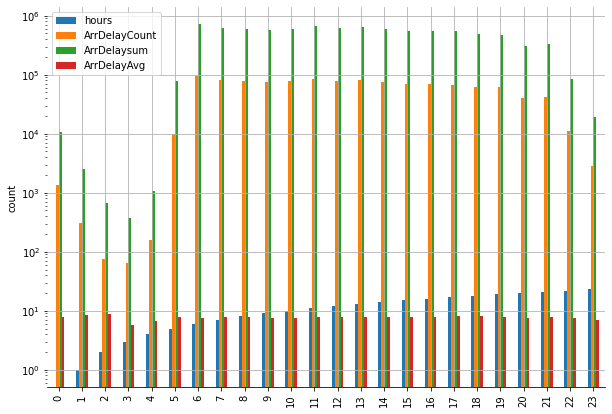

In [137]:
plt.figure(figsize=(10,7))
ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
df.plot.bar(ax=ax);
plt.ylabel('count')
plt.yscale('log')
plt.grid()

the worst dealy around 06 AM

## 03. Flight delay reasons and how much they contribute to the number of delayed flights

In [141]:
df_row = pd.merge(flights.groupby(['UniqueCarrier']).agg(UniqueCarrierCount=('UniqueCarrier', 'count')), 
                  flights[(flights['ArrDelay'] > 15)].groupby(['UniqueCarrier']).agg(ArrDelaycount=('ArrDelay', 'count')),
                  on='UniqueCarrier', how='inner')

In [142]:
df_delay = flights[(flights['ArrDelay'] > 15)]

In [143]:
df_delay = df_delay[(flights['LateAircraftDelay'] != 0) | (flights['SecurityDelay'] != 0) |
        (flights['NASDelay'] != 0) | (flights['WeatherDelay'] != 0) | 
        (flights['CarrierDelay'] != 0) | (flights['WeatherDelay'] != 0)]

In [144]:
df_delay['LateAircraftDelay'] = df_delay['LateAircraftDelay'].apply(lambda x: 1 if x else 0)
df_delay['SecurityDelay'] = df_delay['SecurityDelay'].apply(lambda x: 1 if x else 0)
df_delay['NASDelay'] = df_delay['NASDelay'].apply(lambda x: 1 if x else 0)
df_delay['WeatherDelay'] = df_delay['WeatherDelay'].apply(lambda x: 1 if x else 0)
df_delay['CarrierDelay'] = df_delay['CarrierDelay'].apply(lambda x: 1 if x else 0)

In [145]:
df_delay = df_delay.groupby(['UniqueCarrier']).agg(
    # Get count of the column for each group
    LateAircraftDelayCount=('LateAircraftDelay', sum),
    # Get count of the column for each group
    SecurityDelayCount=('SecurityDelay', sum),
    # Get count of the column for each group
    NASDelayCount=('NASDelay', sum),
    # Get count of the column for each group
    WeatherDelayCount=('WeatherDelay', sum),
    # Get count of the column for each group
    CarrierDelayCount=('CarrierDelay', sum),   
)

In [146]:
df_delay = pd.merge(df_delay, df_row,  on='UniqueCarrier', how='inner')
df_delay

,LateAircraftDelayCount,SecurityDelayCount,NASDelayCount,WeatherDelayCount,CarrierDelayCount,UniqueCarrierCount,ArrDelaycount
UniqueCarrier,,,,,,,
9E,661,7,4185,155,1032,177627,31574
AA,3125,18,15913,536,4864,340780,96860
AQ,14,2,2,0,29,6519,1324
AS,1129,55,5721,68,1417,106312,30643
B6,786,16,3631,12,1085,102867,21414
CO,573,128,6068,172,1810,162159,43855
DL,2573,0,10144,131,2885,249612,70357
EV,987,38,5698,239,2444,184023,42531
F9,1177,0,4698,141,2424,73843,27340


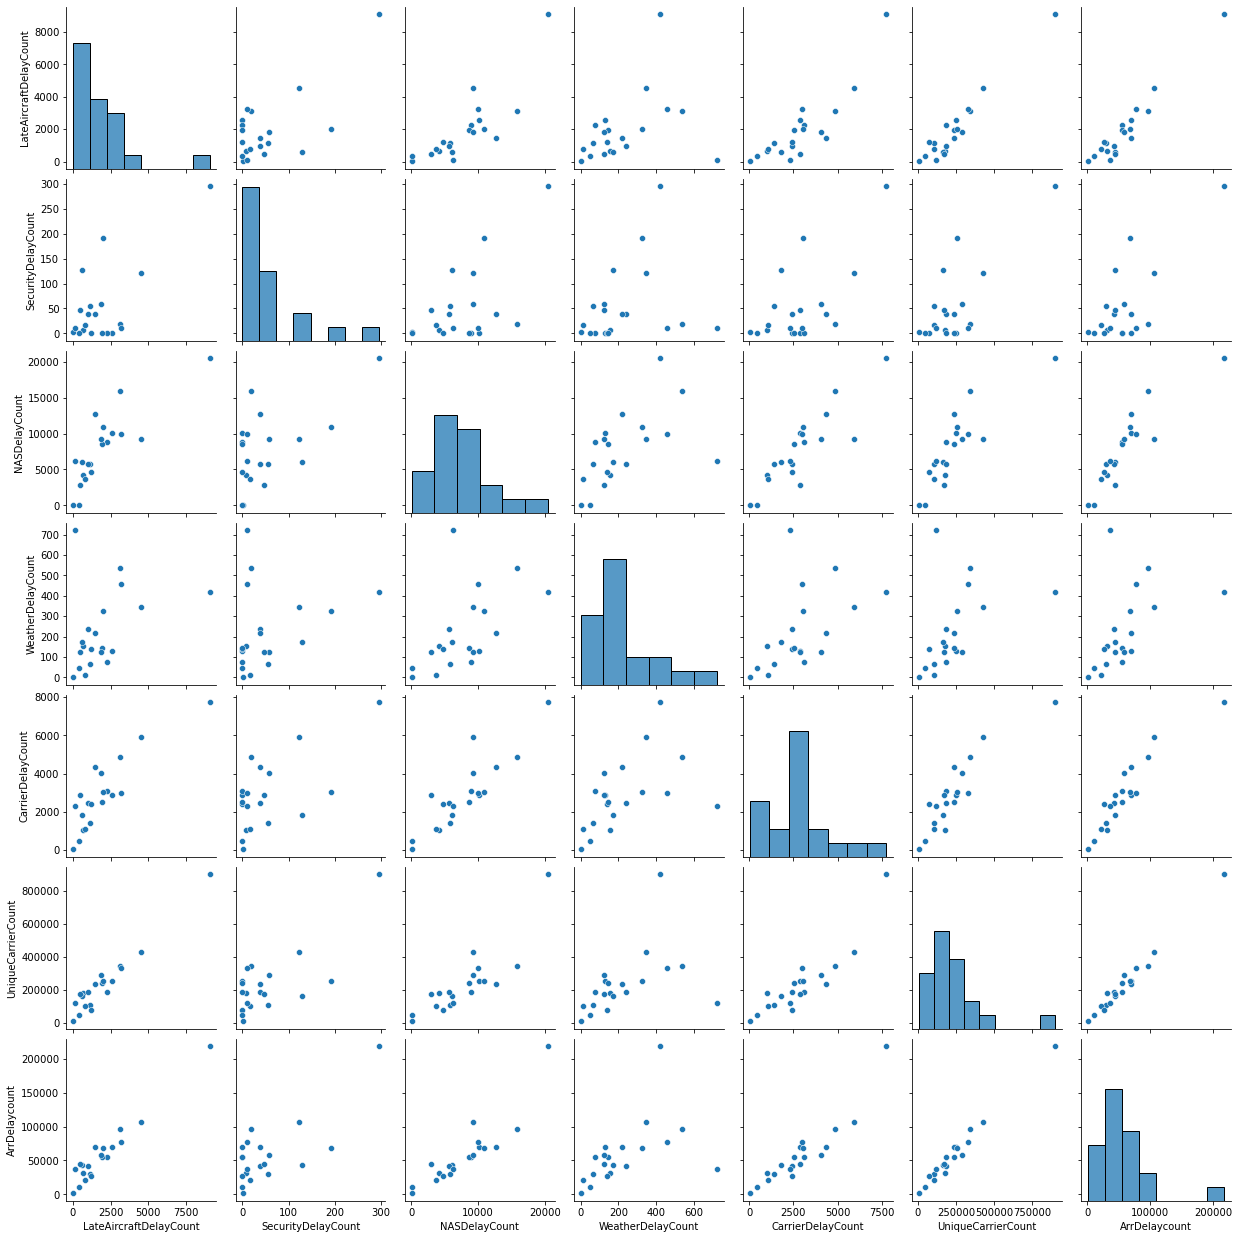

In [147]:
sns.pairplot(df_delay, size = 2.5);

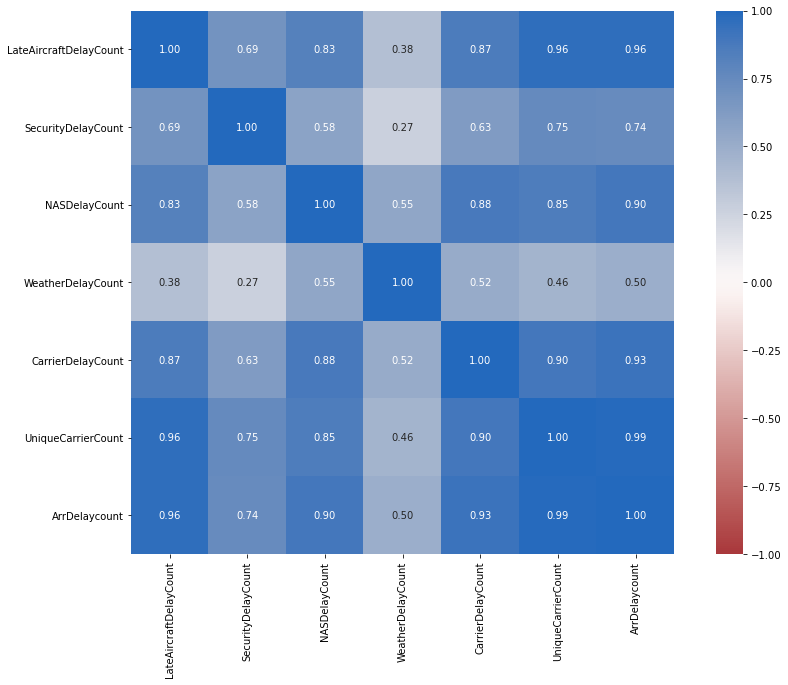

In [148]:
#correlation matrix
corrmat = df_delay.corr()
f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(corrmat, vmin=-1, square=True, annot=True, fmt='.2f', cmap='vlag_r', center=0);

In [149]:
df_delay['pct'] = (df_delay['ArrDelaycount'].astype(float)/df_delay['UniqueCarrierCount'].astype(float)).round(2)

In [150]:
df_delay

,LateAircraftDelayCount,SecurityDelayCount,NASDelayCount,WeatherDelayCount,CarrierDelayCount,UniqueCarrierCount,ArrDelaycount,pct
UniqueCarrier,,,,,,,,
9E,661,7,4185,155,1032,177627,31574,0.18
AA,3125,18,15913,536,4864,340780,96860,0.28
AQ,14,2,2,0,29,6519,1324,0.20
AS,1129,55,5721,68,1417,106312,30643,0.29
B6,786,16,3631,12,1085,102867,21414,0.21
CO,573,128,6068,172,1810,162159,43855,0.27
DL,2573,0,10144,131,2885,249612,70357,0.28
EV,987,38,5698,239,2444,184023,42531,0.23
F9,1177,0,4698,141,2424,73843,27340,0.37


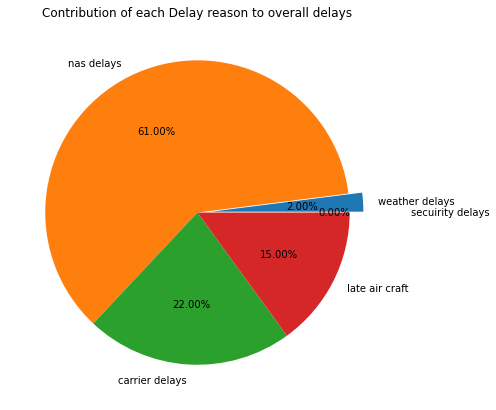

In [152]:
wethear_sum   = df_delay['WeatherDelayCount'].sum()
nas_sum       = df_delay['NASDelayCount'].sum()
carrier_sum   = df_delay['CarrierDelayCount'].sum()
security_sum  = df_delay['SecurityDelayCount'].sum()
aircraft_sum  = df_delay['LateAircraftDelayCount'].sum()
#ArrDelaycount_sum = df_delay['ArrDelaycount'].sum()

num_of_overall = wethear_sum + nas_sum + carrier_sum + security_sum + aircraft_sum

wethear_sum  = (wethear_sum/num_of_overall).round(2)*100
nas_sum      = (nas_sum/num_of_overall).round(2)*100
carrier_sum  = (carrier_sum/num_of_overall).round(2)*100
security_sum = (security_sum/num_of_overall).round(2)*100
aircraft_sum = (aircraft_sum/num_of_overall).round(2)*100

plt.figure(figsize=(10,7))
X = ['weather delays' , 'nas delays','carrier delays','late air craft','secuirity delays']
Y = [wethear_sum, nas_sum, carrier_sum, aircraft_sum, security_sum]
plt.pie(Y, labels=X , explode=[0.09,0,0,0,0.3],  autopct='%1.2f%%');
plt.title('Contribution of each Delay reason to overall delays');

We also see that the weather is not the main reason for delays. Weather only contributes to 2% of the delays.

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!